In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

C:\Users\Daniella\AppData\Local\Temp\ipykernel_13620\674597481.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('Salary_dataset.csv')
df.head()

,YearsExperience,Salary
0,1.2,39344
1,1.4,46206
2,1.6,37732
3,2.1,43526
4,2.3,39892


In [3]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
fig = px.box(df, x='Salary')
fig.show()

In [5]:
fig = px.box(df, x='YearsExperience')
fig.show()

In [6]:
for x in df.columns:
    fig = px.box(df, x=x)
    fig.show()

In [7]:
#split our data to independent and dependent variable
x = df.drop('Salary', axis=1)
y = df['Salary']

In [8]:
#split our data to training data and testing data
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.15)

In [9]:
#training the model or the algorithm
linreg = LinearRegression()
linreg.fit(xtrain,ytrain)

LinearRegression()

In [10]:
#evaluating the model by validating witht the test data
pred1 = linreg.predict(xtest)
pred1

array([123675.20319479, 111326.39893014, 100877.41070621,  68580.53801404,
        93278.14654334])

In [11]:
ytest

28    122392
25    105583
22    101303
14     61112
21     98274
Name: Salary, dtype: int64

In [12]:
print(r2_score(ytest,pred1))

0.9429041361182803


In [13]:
print(mean_absolute_error(ytest,pred1))
print(mean_absolute_percentage_error(ytest,pred1))

3983.316577885108
0.04842583077289962


In [14]:
print(linreg.coef_)

[9499.08020358]


In [15]:
yos = float(input('Enter your years of exp...:'))
linreg.predict([[yos]])

c:\Users\Daniella\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([72380.17009547])

In [16]:
df2 = pd.read_csv('mobile_prices_2023.csv')
df2.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [17]:
df2.isnull().sum()

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          174
Back/Rare Camera       9
Front Camera         401
Battery               10
Processor             55
Price in INR           0
Date of Scraping       0
dtype: int64

In [18]:
categorical = df2.select_dtypes(include=['object','category'])
numerical = df2.select_dtypes(include=['int','float'])

for x in categorical:
    df2[x].fillna(df2[x].mode()[0],inplace=True)

for x in numerical:
    df2[x].fillna(df2[x].mean(),inplace=True)

df2.isnull().sum()

C:\Users\Daniella\AppData\Local\Temp\ipykernel_13620\1553440155.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Daniella\AppData\Local\Temp\ipykernel_13620\1553440155.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

Phone Name           0
Rating ?/5           0
Number of Ratings    0
RAM                  0
ROM/Storage          0
Back/Rare Camera     0
Front Camera         0
Battery              0
Processor            0
Price in INR         0
Date of Scraping     0
dtype: int64

In [19]:
df2['Number of Ratings'] = df2['Number of Ratings'].str.replace(',','')
df2['Number of Ratings'] = pd.to_numeric(df2['Number of Ratings'])
df2['Price in INR'] = df2['Price in INR'].str.replace(',','')
df2['Price in INR'] = df2['Price in INR'].str.replace('₹','')
df2['Price in INR'] = pd.to_numeric(df2['Price in INR'])

df2.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,33561,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,77128,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,11999,2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,15175,4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,22621,4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,7749,2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,15175,4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999,2023-06-17


In [20]:
df2.drop('Date of Scraping', axis=1, inplace=True)
df2.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR
0,"POCO C50 (Royal Blue, 32 GB)",4.2,33561,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,77128,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,11999
2,"POCO C51 (Royal Blue, 64 GB)",4.3,15175,4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999
3,"POCO C55 (Cool Blue, 64 GB)",4.2,22621,4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,7749
4,"POCO C51 (Power Black, 64 GB)",4.3,15175,4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,6999


In [21]:
categorical = df2.select_dtypes(include=['object','category'])
encoder = LabelEncoder()
for x in categorical:
    df2[x] = encoder.fit_transform(df2[x])
df2.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR
0,746,4.2,33561,16,14,171,26,78,187,5649
1,789,4.2,77128,25,20,118,32,78,173,11999
2,748,4.3,15175,25,20,172,26,78,106,6999
3,750,4.2,22621,25,20,137,26,78,193,7749
4,747,4.3,15175,25,20,172,26,78,106,6999


In [22]:
X = df2.drop('Price in INR', axis=1)
Y = df2['Price in INR']

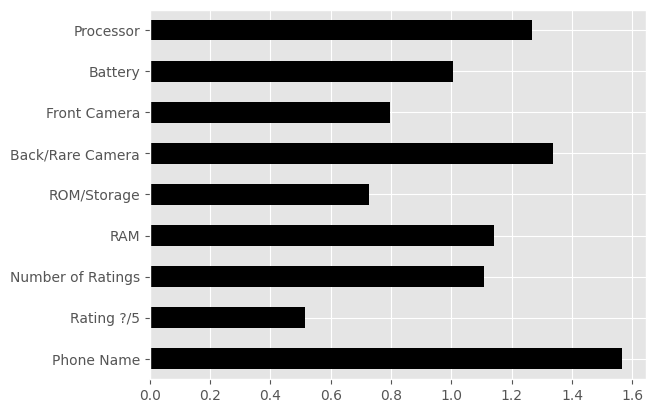

In [23]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
plt.style.use('ggplot')
importance = mutual_info_regression(X,Y)
feature_impor = pd.Series(importance,X.columns[0:len(X.columns)])
feature_impor.plot(kind = 'barh', color = 'black')
plt.show()

In [29]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2)

In [30]:
tree = DecisionTreeRegressor()
tree.fit(Xtrain,Ytrain)

DecisionTreeRegressor()

In [31]:
pred_tree = tree.predict(Xtest)
print(r2_score(Ytest,pred_tree))

0.8575135313067485
